# 03. Attention U-Net Model Training

This notebook is used to train the Attention U-Net model.

In [3]:
%cd ~/Documents/DISSERTATION

/Users/t/Documents/DISSERTATION


In [5]:
import sys
import os
import torch
import yaml
import json
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# Import modules
from models.attention_unet import AttentionUNet
from models.unet import UNet
from engine.trainer import Trainer
from datasets import create_data_loaders
from utils.metrics import SegmentationMetrics

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")


使用设备: cpu


In [7]:
# Load configuration
with open('configs/attention_unet.yaml', 'r') as f:
    config = yaml.safe_load(f)

# Modify for Attention U-Net settings
config['model']['name'] = 'attention_unet'
config['model']['dropout'] = 0.10


Attention U-Net配置加载完成


In [9]:
# Create data loaders
train_loader, val_loader, test_loader, pos_weight = create_data_loaders(config)

print("Dataset sizes:")
print(f"Training set: {len(train_loader.dataset)}")
print(f"Validation set: {len(val_loader.dataset)}")
print(f"Test set: {len(test_loader.dataset)}")


Loaded 246 samples for train split
Loaded 246 samples for val split
Loaded 212 samples for test split
数据集大小:
训练集: 246
验证集: 246
测试集: 212


In [11]:
# Create Attention U-Net model
attention_model = AttentionUNet(
    in_channels=config['model']['in_channels'],
    out_channels=config['model']['out_channels'],
    features=config['model']['features'],
    dropout=config['model']['dropout']
).to(device)

attention_model.print_summary()

# Compare parameter count
unet_params = sum(p.numel() for p in UNet().parameters())
attention_params = sum(p.numel() for p in attention_model.parameters())
print(f"Additional parameters: {attention_params - unet_params:,} "
      f"({(attention_params - unet_params) / unet_params * 100:.1f}%)")


Model: Attention U-Net
Input size: (1, 512, 512)
Output size: (1, 512, 512)
------------------------------------------------------------
Total params: 13,745,709
Trainable params: 13,745,709
Non-trainable params: 0
Model size: 52.47 MB
参数增加: 351,532 (2.6%)


In [15]:
# Start training
trainer = Trainer(attention_model, config, device)
print("Starting Attention U-Net training...")

num_epochs = config['training']['num_epochs']
history = trainer.train(num_epochs=num_epochs)

print("Training completed!")


Loaded 246 samples for train split
Loaded 246 samples for val split
Loaded 212 samples for test split
Training on device: cpu
Dataset sizes - Train: 246, Val: 246, Test: 212
Positive weight: 2.961
开始训练Attention U-Net...
Starting training for 40 epochs...


/opt/anaconda3/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Training:   0%|          | 0/16 [00:00<?, ?it/s]

Validation:   0%|          | 0/16 [00:00<?, ?it/s]

Best model saved to checkpoints/attention_unet/best_model.pt
Epoch 1/40 - 1493.26s
  Train - Loss: 0.5221, Dice: 0.6409
  Val   - Loss: 0.8480, Dice: 0.5834, IoU: 0.4536
  LR: 0.001000


Training:   0%|          | 0/16 [00:00<?, ?it/s]

Validation:   0%|          | 0/16 [00:00<?, ?it/s]

Best model saved to checkpoints/attention_unet/best_model.pt
Epoch 2/40 - 1481.52s
  Train - Loss: 0.4031, Dice: 0.7573
  Val   - Loss: 0.4371, Dice: 0.7408, IoU: 0.5956
  LR: 0.001000


Training:   0%|          | 0/16 [00:00<?, ?it/s]

Validation:   0%|          | 0/16 [00:00<?, ?it/s]

Best model saved to checkpoints/attention_unet/best_model.pt
Epoch 3/40 - 1478.83s
  Train - Loss: 0.3265, Dice: 0.8111
  Val   - Loss: 0.3134, Dice: 0.8150, IoU: 0.6973
  LR: 0.001000


Training:   0%|          | 0/16 [00:00<?, ?it/s]

Validation:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 4/40 - 1482.80s
  Train - Loss: 0.3076, Dice: 0.8100
  Val   - Loss: 0.4209, Dice: 0.7586, IoU: 0.6288
  LR: 0.001000


Training:   0%|          | 0/16 [00:00<?, ?it/s]

Validation:   0%|          | 0/16 [00:00<?, ?it/s]

Best model saved to checkpoints/attention_unet/best_model.pt
Epoch 5/40 - 1484.23s
  Train - Loss: 0.2452, Dice: 0.8550
  Val   - Loss: 0.2500, Dice: 0.8372, IoU: 0.7254
  LR: 0.001000


Training:   0%|          | 0/16 [00:00<?, ?it/s]

Validation:   0%|          | 0/16 [00:00<?, ?it/s]

Best model saved to checkpoints/attention_unet/best_model.pt
Epoch 6/40 - 1485.19s
  Train - Loss: 0.2134, Dice: 0.8692
  Val   - Loss: 0.1814, Dice: 0.8979, IoU: 0.8196
  LR: 0.001000


Training:   0%|          | 0/16 [00:00<?, ?it/s]

Validation:   0%|          | 0/16 [00:00<?, ?it/s]

Best model saved to checkpoints/attention_unet/best_model.pt
Epoch 7/40 - 1487.11s
  Train - Loss: 0.1667, Dice: 0.8999
  Val   - Loss: 0.1572, Dice: 0.9057, IoU: 0.8320
  LR: 0.001000


Training:   0%|          | 0/16 [00:00<?, ?it/s]

Validation:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 8/40 - 1480.71s
  Train - Loss: 0.1526, Dice: 0.9079
  Val   - Loss: 0.1618, Dice: 0.9037, IoU: 0.8326
  LR: 0.001000


Training:   0%|          | 0/16 [00:00<?, ?it/s]

Validation:   0%|          | 0/16 [00:00<?, ?it/s]

Best model saved to checkpoints/attention_unet/best_model.pt
Epoch 9/40 - 1475.79s
  Train - Loss: 0.1376, Dice: 0.9186
  Val   - Loss: 0.1193, Dice: 0.9250, IoU: 0.8633
  LR: 0.001000


Training:   0%|          | 0/16 [00:00<?, ?it/s]

Validation:   0%|          | 0/16 [00:00<?, ?it/s]

Best model saved to checkpoints/attention_unet/best_model.pt
Epoch 10/40 - 1476.82s
  Train - Loss: 0.1251, Dice: 0.9274
  Val   - Loss: 0.1170, Dice: 0.9380, IoU: 0.8860
  LR: 0.001000
  Detailed Val Metrics:
    Precision: 0.9462
    Recall: 0.9336
    Accuracy: 0.9700


Training:   0%|          | 0/16 [00:00<?, ?it/s]

Validation:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 11/40 - 1468.91s
  Train - Loss: 0.1233, Dice: 0.9277
  Val   - Loss: 0.1065, Dice: 0.9350, IoU: 0.8823
  LR: 0.001000


Training:   0%|          | 0/16 [00:00<?, ?it/s]

Validation:   0%|          | 0/16 [00:00<?, ?it/s]

Best model saved to checkpoints/attention_unet/best_model.pt
Epoch 12/40 - 1471.90s
  Train - Loss: 0.1263, Dice: 0.9236
  Val   - Loss: 0.1053, Dice: 0.9405, IoU: 0.8899
  LR: 0.001000


Training:   0%|          | 0/16 [00:00<?, ?it/s]

Validation:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 13/40 - 1469.09s
  Train - Loss: 0.1160, Dice: 0.9294
  Val   - Loss: 0.1170, Dice: 0.9241, IoU: 0.8633
  LR: 0.001000


Training:   0%|          | 0/16 [00:00<?, ?it/s]

Validation:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 14/40 - 1470.06s
  Train - Loss: 0.1043, Dice: 0.9375
  Val   - Loss: 0.1103, Dice: 0.9296, IoU: 0.8716
  LR: 0.001000


Training:   0%|          | 0/16 [00:00<?, ?it/s]

Validation:   0%|          | 0/16 [00:00<?, ?it/s]

Best model saved to checkpoints/attention_unet/best_model.pt
Epoch 15/40 - 1468.44s
  Train - Loss: 0.0921, Dice: 0.9458
  Val   - Loss: 0.0886, Dice: 0.9498, IoU: 0.9066
  LR: 0.001000


Training:   0%|          | 0/16 [00:00<?, ?it/s]

Validation:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 16/40 - 1470.68s
  Train - Loss: 0.0950, Dice: 0.9416
  Val   - Loss: 0.0950, Dice: 0.9487, IoU: 0.9048
  LR: 0.001000


Training:   0%|          | 0/16 [00:00<?, ?it/s]

Validation:   0%|          | 0/16 [00:00<?, ?it/s]

Best model saved to checkpoints/attention_unet/best_model.pt
Epoch 17/40 - 1467.58s
  Train - Loss: 0.0918, Dice: 0.9468
  Val   - Loss: 0.0856, Dice: 0.9533, IoU: 0.9128
  LR: 0.001000


Training:   0%|          | 0/16 [00:00<?, ?it/s]

Validation:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 18/40 - 1468.94s
  Train - Loss: 0.0900, Dice: 0.9480
  Val   - Loss: 0.0838, Dice: 0.9531, IoU: 0.9124
  LR: 0.001000


Training:   0%|          | 0/16 [00:00<?, ?it/s]

Validation:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 19/40 - 1468.25s
  Train - Loss: 0.0993, Dice: 0.9391
  Val   - Loss: 0.0890, Dice: 0.9452, IoU: 0.8981
  LR: 0.001000


Training:   0%|          | 0/16 [00:00<?, ?it/s]

Validation:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 20/40 - 1467.36s
  Train - Loss: 0.1008, Dice: 0.9399
  Val   - Loss: 0.0964, Dice: 0.9386, IoU: 0.8869
  LR: 0.001000
  Detailed Val Metrics:
    Precision: 0.9130
    Recall: 0.9686
    Accuracy: 0.9689


Training:   0%|          | 0/16 [00:00<?, ?it/s]

Validation:   0%|          | 0/16 [00:00<?, ?it/s]

Best model saved to checkpoints/attention_unet/best_model.pt
Epoch 21/40 - 1474.45s
  Train - Loss: 0.0920, Dice: 0.9434
  Val   - Loss: 0.0830, Dice: 0.9539, IoU: 0.9139
  LR: 0.000500


Training:   0%|          | 0/16 [00:00<?, ?it/s]

Validation:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 22/40 - 1472.84s
  Train - Loss: 0.0853, Dice: 0.9489
  Val   - Loss: 0.0809, Dice: 0.9525, IoU: 0.9107
  LR: 0.000500


Training:   0%|          | 0/16 [00:00<?, ?it/s]

Validation:   0%|          | 0/16 [00:00<?, ?it/s]

Best model saved to checkpoints/attention_unet/best_model.pt
Epoch 23/40 - 1472.45s
  Train - Loss: 0.0781, Dice: 0.9529
  Val   - Loss: 0.0772, Dice: 0.9568, IoU: 0.9190
  LR: 0.000500


Training:   0%|          | 0/16 [00:00<?, ?it/s]

Validation:   0%|          | 0/16 [00:00<?, ?it/s]

Best model saved to checkpoints/attention_unet/best_model.pt
Epoch 24/40 - 1483.12s
  Train - Loss: 0.0775, Dice: 0.9538
  Val   - Loss: 0.0760, Dice: 0.9585, IoU: 0.9218
  LR: 0.000500


Training:   0%|          | 0/16 [00:00<?, ?it/s]

Validation:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 25/40 - 1472.74s
  Train - Loss: 0.0761, Dice: 0.9548
  Val   - Loss: 0.0756, Dice: 0.9582, IoU: 0.9213
  LR: 0.000500


Training:   0%|          | 0/16 [00:00<?, ?it/s]

Validation:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 26/40 - 1472.47s
  Train - Loss: 0.0771, Dice: 0.9546
  Val   - Loss: 0.0748, Dice: 0.9574, IoU: 0.9197
  LR: 0.000500


Training:   0%|          | 0/16 [00:00<?, ?it/s]

Validation:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 27/40 - 1476.40s
  Train - Loss: 0.0750, Dice: 0.9556
  Val   - Loss: 0.0748, Dice: 0.9567, IoU: 0.9184
  LR: 0.000500


Training:   0%|          | 0/16 [00:00<?, ?it/s]

Validation:   0%|          | 0/16 [00:00<?, ?it/s]

Best model saved to checkpoints/attention_unet/best_model.pt
Epoch 28/40 - 1472.06s
  Train - Loss: 0.0739, Dice: 0.9561
  Val   - Loss: 0.0738, Dice: 0.9601, IoU: 0.9250
  LR: 0.000500


Training:   0%|          | 0/16 [00:00<?, ?it/s]

Validation:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 29/40 - 1478.58s
  Train - Loss: 0.0725, Dice: 0.9565
  Val   - Loss: 0.0765, Dice: 0.9578, IoU: 0.9210
  LR: 0.000500


Training:   0%|          | 0/16 [00:00<?, ?it/s]

Validation:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 30/40 - 1479.50s
  Train - Loss: 0.0812, Dice: 0.9519
  Val   - Loss: 0.0754, Dice: 0.9566, IoU: 0.9185
  LR: 0.000500
  Detailed Val Metrics:
    Precision: 0.9504
    Recall: 0.9651
    Accuracy: 0.9783


Training:   0%|          | 0/16 [00:00<?, ?it/s]

Validation:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 31/40 - 1477.32s
  Train - Loss: 0.0770, Dice: 0.9533
  Val   - Loss: 0.0779, Dice: 0.9525, IoU: 0.9122
  LR: 0.000500


Training:   0%|          | 0/16 [00:00<?, ?it/s]

Validation:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 32/40 - 1478.91s
  Train - Loss: 0.0755, Dice: 0.9536
  Val   - Loss: 0.0825, Dice: 0.9553, IoU: 0.9168
  LR: 0.000250


Training:   0%|          | 0/16 [00:00<?, ?it/s]

Validation:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch 33/40 - 1480.06s
  Train - Loss: 0.0765, Dice: 0.9546
  Val   - Loss: 0.0716, Dice: 0.9583, IoU: 0.9213
  LR: 0.000250


Training:   0%|          | 0/16 [00:00<?, ?it/s]

Validation:   0%|          | 0/16 [00:00<?, ?it/s]

Early stopping triggered at epoch 33
Training completed! Best validation Dice: 0.9601
训练完成!


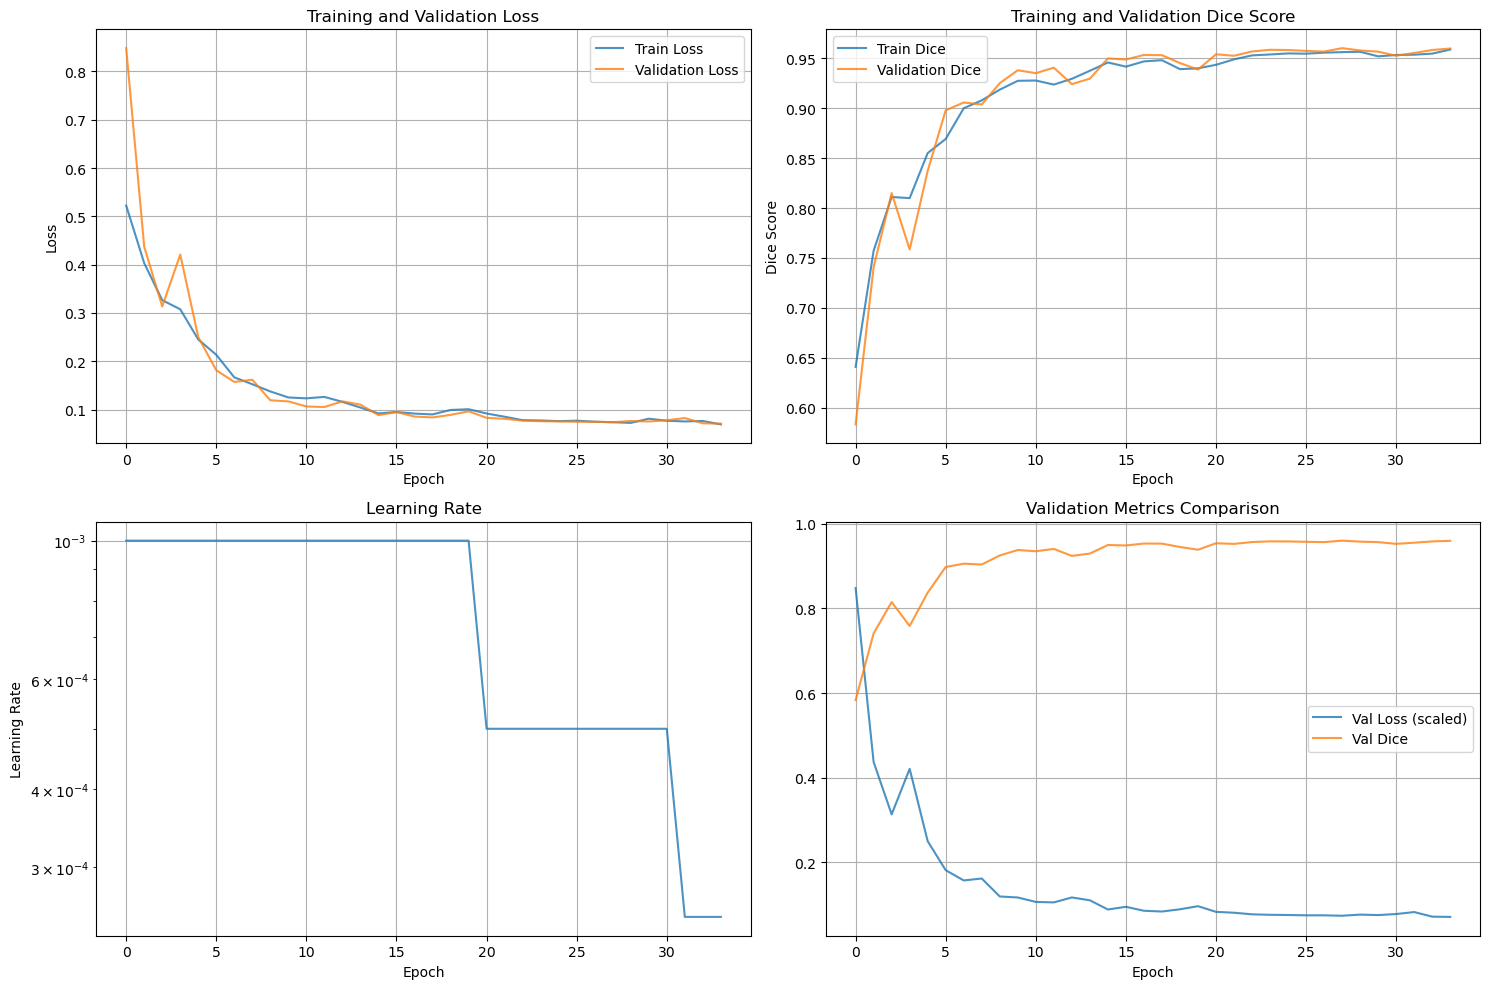

最佳验证Dice: 0.9601
最终验证Dice: 0.9597


In [19]:
# Plot training curves
trainer.plot_training_curves()

print(f"Best validation Dice: {max(history['val_dice']):.4f}")
print(f"Final validation Dice: {history['val_dice'][-1]:.4f}")


验证集预测可视化:


/var/folders/6n/2rqv_pbj5r5g_dc4brtwrg800000gn/T/ipykernel_31585/312952954.py:72: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6n/2rqv_pbj5r5g_dc4brtwrg800000gn/T/ipykernel_31585/312952954.py:72: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6n/2rqv_pbj5r5g_dc4brtwrg800000gn/T/ipykernel_31585/312952954.py:72: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6n/2rqv_pbj5r5g_dc4brtwrg800000gn/T/ipykernel_31585/312952954.py:72: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6n/2rqv_pbj5r5g_dc4brtwrg800000gn/T/ipykernel_31585/312952954.py:72: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6n/2rqv_pbj5

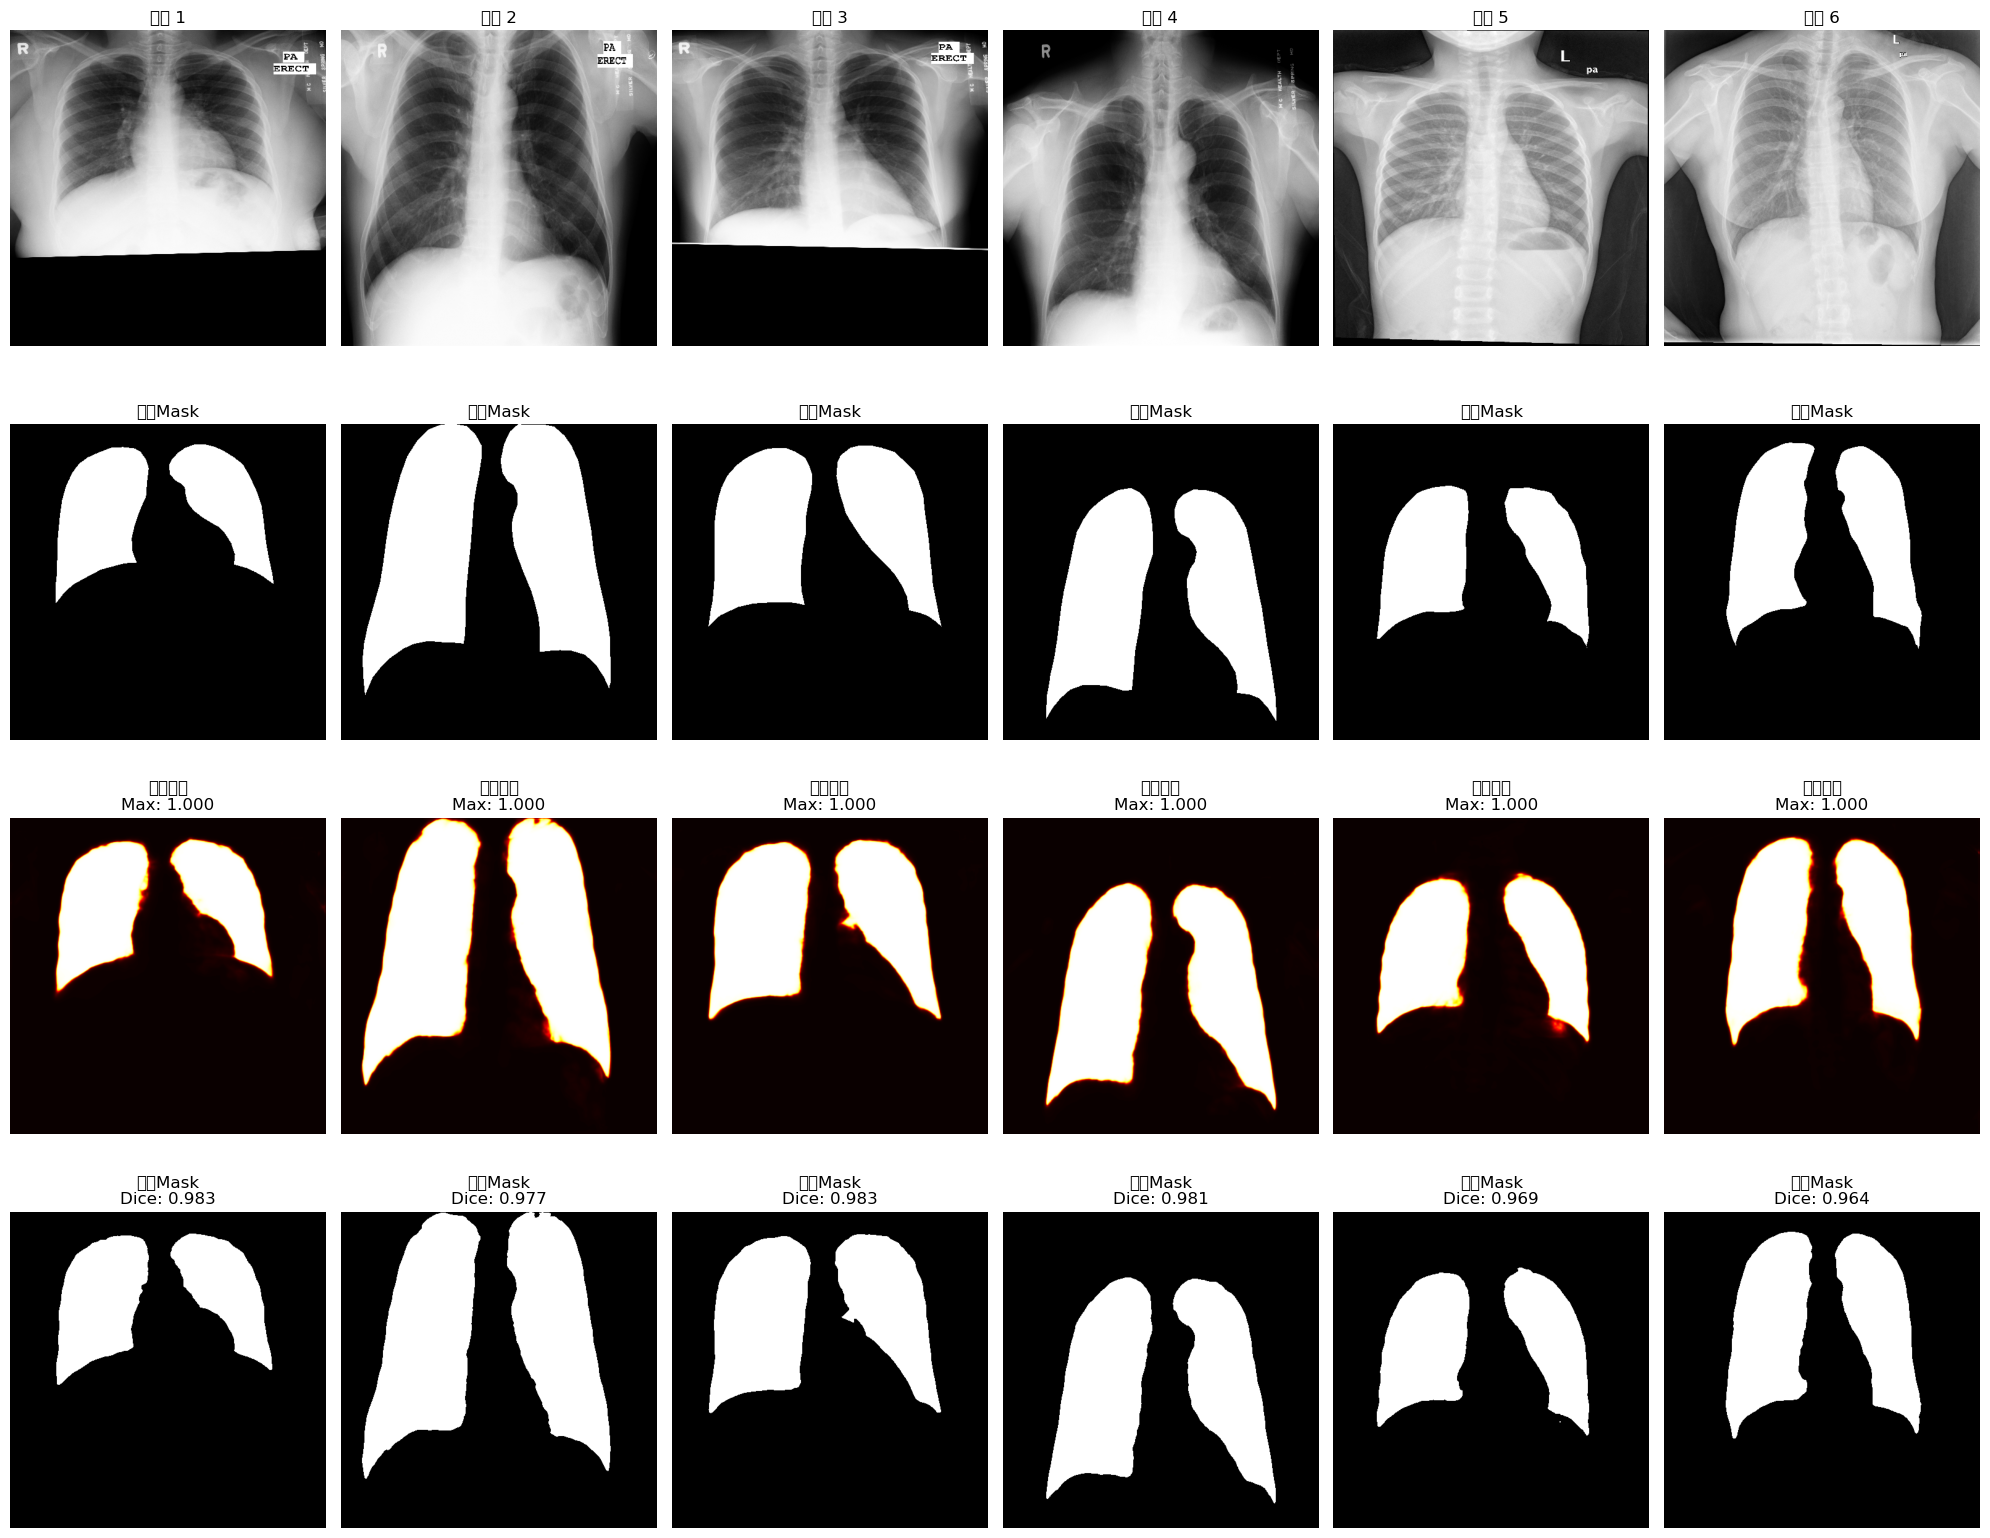

In [25]:
# Load the best model for inference
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

ckpt_path = 'checkpoints/attention_unet/best_model.pt'  
# ckpt = torch.load(ckpt_path, map_location=device)
ckpt = torch.load(ckpt_path, map_location=device, weights_only=False)

cfg  = ckpt.get('config', {})
mcfg = dict(cfg.get('model', {}))  
name = mcfg.pop('name', 'unet')    

model.load_state_dict(ckpt['model_state_dict'])
model.to(device).eval()

# Visualize predictions on the validation set
def visualize_predictions(model, dataloader, num_samples=6):
    model.eval()
    
    # Randomly select samples
    sample_indices = np.random.choice(len(dataloader.dataset), num_samples, replace=False)
    
    fig, axes = plt.subplots(4, num_samples, figsize=(20, 16))
    
    with torch.no_grad():
        for i, idx in enumerate(sample_indices):
            sample = dataloader.dataset[idx]
            
            image = sample['image'].unsqueeze(0).to(device)
            mask = sample['mask'].squeeze().cpu().numpy()
            
            # Model prediction
            pred = model(image)
            pred_prob = torch.sigmoid(pred).squeeze().cpu().numpy()
            pred_binary = (pred_prob > 0.5).astype(np.float32)
            
            # Original image
            img_display = image.squeeze().cpu().numpy()
            axes[0, i].imshow(img_display, cmap='gray')
            axes[0, i].set_title(f'Original {i+1}')
            axes[0, i].axis('off')
            
            # Ground-truth mask
            axes[1, i].imshow(mask, cmap='gray')
            axes[1, i].set_title('Ground Truth Mask')
            axes[1, i].axis('off')
            
            # Prediction probability map
            axes[2, i].imshow(pred_prob, cmap='hot')
            axes[2, i].set_title(f'Prediction Probability\nMax: {pred_prob.max():.3f}')
            axes[2, i].axis('off')
            
            # Binarized prediction
            axes[3, i].imshow(pred_binary, cmap='gray')
            
            # Compute Dice score
            from utils.metrics import dice_coefficient
            dice = dice_coefficient(pred, sample['mask'].unsqueeze(0))
            axes[3, i].set_title(f'Predicted Mask\nDice: {dice:.3f}')
            axes[3, i].axis('off')
    
    plt.tight_layout()
    plt.show()

print("Validation set prediction visualization:")
visualize_predictions(model, val_loader, num_samples=6)


In [27]:
def evaluate_on_test_set(model, test_loader):
    model.eval()
    test_metrics = SegmentationMetrics()
    
    with torch.no_grad():
        for batch in tqdm(test_loader, desc='Testing'):
            images = batch['image'].to(device)
            masks = batch['mask'].to(device)
            
            outputs = model(images)
            test_metrics.update(outputs, masks)
    
    results = test_metrics.compute()
    return results

# Evaluate on test set
test_results = evaluate_on_test_set(model, test_loader)

print("=== Test Set Results ===")
print(f"Dice Score: {test_results['dice']:.4f} ± {test_results['dice_std']:.4f}")
print(f"IoU Score: {test_results['iou']:.4f} ± {test_results['iou_std']:.4f}")
print(f"Precision: {test_results['precision']:.4f}")
print(f"Recall: {test_results['recall']:.4f}")
print(f"Accuracy: {test_results['accuracy']:.4f}")
print(f"F1 Score: {test_results['f1']:.4f}")


在测试集上评估...


测试:   0%|          | 0/14 [00:00<?, ?it/s]

=== 测试集结果 ===
Dice Score: 0.9580 ± 0.0267
IoU Score: 0.9206 ± 0.0468
Precision: 0.9630
Recall: 0.9551
Accuracy: 0.9790
F1 Score: 0.9580
